In [1]:
# This jupyter notebook is prepared by Jason Saini.

## Load Data and perform basic EDA 

In [2]:
import pandas as pd
import nltk   
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [3]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
plt.ion()
# create a list & show first 10 items
list = [line.rstrip() for line in open("news.csv",encoding="utf8")]
for text in list[:10]:
    print(text)
    print('\n')

title	text	subject	date	target


As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [5]:
# load text into dataframe and show top 5 and last 5 entries
data = pd.read_csv("news.csv", sep = '\t', names = ["title", "text", "subject", "date", "target"])
data = data.drop(index = [0])
data.head()

,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
data.tail()


,title,text,subject,date,target
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44898,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [7]:
# check for null values
data.isnull().sum().sort_values(ascending = False)

title      0
text       0
subject    0
date       0
target     0
dtype: int64

## NO NULL VALUES

<AxesSubplot:xlabel='subject', ylabel='count'>

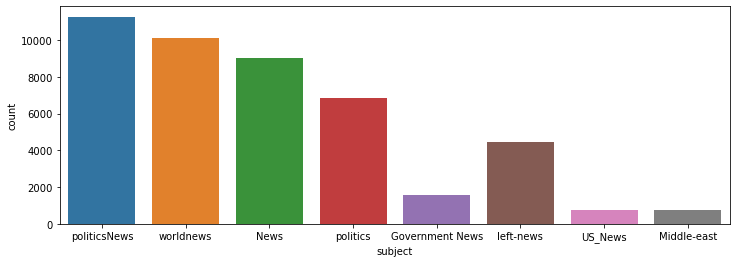

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x = "subject", data = data)

<AxesSubplot:xlabel='target', ylabel='count'>

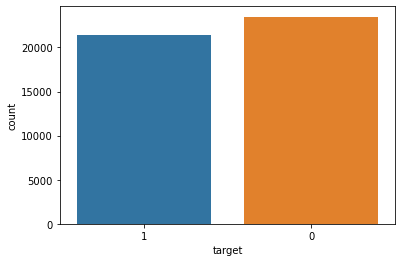

In [9]:
sns.countplot(x = "target", data = data)

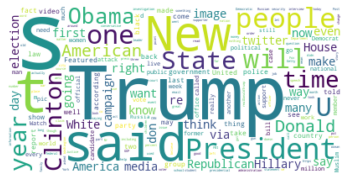

In [10]:
# Generate two word clouds, one for fake news and one for true news
fake_df = data[data['target'] == '0']
true_df = data[data['target'] == '1']
fake_news_big_text = " ".join(text for text in fake_df.text) 
true_news_big_text = " ".join(text for text in true_df.text)

fake_cloud = WordCloud(collocations = False, background_color = 'white').generate(fake_news_big_text)
plt.imshow(fake_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

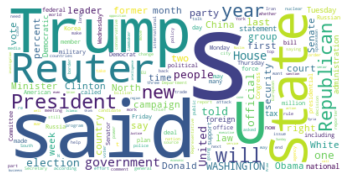

In [11]:
plt.clf()
true_cloud =  WordCloud(collocations = False, background_color = 'white').generate(true_news_big_text)
plt.imshow(true_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Observation: Trump, 's', and "President" are prevalent in both word clouds, so it might be worth looking into to remove these words.

In [12]:
# Create a column "AllText" that has the concatenated subject, title, and text 
cols = ['subject', 'title', 'text']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [13]:
# save this data frame for later
copied_data = data.copy()

In [14]:
# drop title, text, subject, and date from df
data = data.drop(columns=["title", "text", "subject", "date"])

In [15]:
data["length"] = data["AllText"].str.len()
data

,target,AllText,length
1,1,"politicsNews_As U.S. budget fight looms, Repub...",4737
2,1,politicsNews_U.S. military to accept transgend...,4155
3,1,politicsNews_Senior U.S. Republican senator: '...,2863
4,1,politicsNews_FBI Russia probe helped by Austra...,2534
5,1,politicsNews_Trump wants Postal Service to cha...,5287
...,...,...,...
44894,0,Middle-east_McPain: John McCain Furious That I...,3311
44895,0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...,1778
44896,0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...,25163
44897,0,Middle-east_How to Blow $700 Million: Al Jazee...,2765


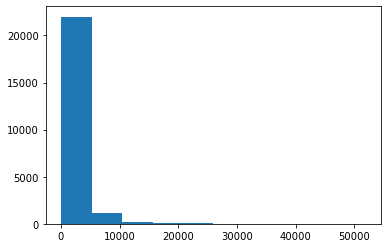

In [16]:
# Plot two histograms to see the distribution of the lengths. One for fake news and one for true news
fake_df = data[data["target"] == '0']
plt.hist(x = "length", data = fake_df)
plt.show()

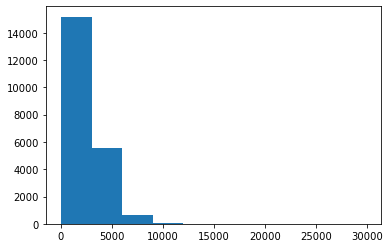

In [17]:
true_df = data[data["target"] == '1']
plt.hist(x = "length", data = true_df)
plt.show()

## TFIDF:  Also known as Term Frequency Inverse Document Frequency, it allows us to measure and quantify the significance/relevance of a string in a corpus. 

## Creating a bag of words using sklearn: To create a bag of words in sklearn, we use a count vectorizer and the get_feature_names method, which contains the unique words for our BOW. 

## How to generate TFIDF for bag of words in sklearn: We can use a TfidfVectorizer in sklearn, and use the .fit_transform() method on our corpus to do TFIDF vectorization

## Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test =  train_test_split(data['AllText'], data['target'], test_size=0.2)

## Training and Testing Fake news classifier using MultinomialNB

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string

from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

   
    stopwordList = stopwords.words('english')
    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [20]:
# fit pipeline
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

In [21]:
# generate a classification report 
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4666
           1       0.95      0.96      0.96      4314

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [22]:
# generate a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test,predictions)

array([[4454,  161],
       [ 212, 4153]], dtype=int64)

In [23]:
# test on current news sample:
news_sample = "Bitcoin is poised to see its first monthly decline since January with rising borrowing rates curtailing investors’ appetite for riskier assets.  The largest cryptocurrency by market value fell Friday to below $40,000, and is down nearly 14% in April. Ether, the next largest token, was also lower, and has slumped around 13%."
pipeline.predict([news_sample])

array(['1'], dtype='<U1')

## Training and Testing a Deep Neural Network

In [24]:
# import MLP classifier and create a pipeline using at least 2 layers and verbose = 2
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [ ]:
# fit pipeline and perform prediction
pipeline.fit(msg_train, label_train)
predictions = pipeline.predict(msg_test)

In [ ]:
# classification report
print(classification_report(predictions,label_test))

In [ ]:
# confusion matrix
confusion_matrix(label_test,predictions)

## Thoughts on Performance: Interestingly enough, training with a deep neaural network yielded 3% higher (99%) accuracy compared to the MultinomialNB pipeline. It seems like the better of the two for this ML problem 

In [ ]:
# Test on same news from above
pipeline.predict([news_sample])

## Comparison to NB model:

## Extra Credit